<h2>The circles data — non-linearly separable data</h2>

In [66]:
from sklearn.datasets import make_circles
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

In [67]:
#creating data
X, y = make_circles(n_samples=1000, random_state=42, noise=0.14, factor=0.2)

#normalizing data
X = StandardScaler().fit_transform(X)

<h3>Plotando os dados</h3>

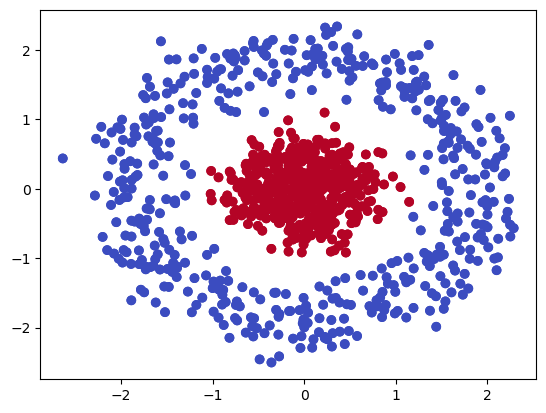

In [68]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)

<h3>Testando modelos e comparando resultados</h3>

In [95]:
print("Accuracies: ")

lr = LogisticRegression()
scores = cross_val_score(lr, X, y, cv=5, scoring='accuracy').mean()
print("Logistic Regression:", scores)
lr = lr.fit(X, y)

C = 1.0
svc = SVC(kernel='linear', C=C)
scores = cross_val_score(svc, X, y, cv=5, scoring='accuracy').mean()
print("Linear SVM:", scores)
linear_svc = svc.fit(X, y)

svc = SVC(kernel='rbf', gamma=0.7, C=C)
scores = cross_val_score(svc, X, y, cv=5, scoring='accuracy').mean()
print("RBF SVM:", scores)
rbf_svc = svc.fit(X, y)

svc = SVC(kernel='poly', degree=3, C=C)
scores = cross_val_score(svc, X, y, cv=5, scoring='accuracy').mean()
print("Polynomial SVM (degree 3):", scores)
poly_svc = svc.fit(X, y)

Accuracies: 
Logistic Regression: 0.47400000000000003
Linear SVM: 0.6609999999999999
RBF SVM: 0.998
Polynomial SVM (degree 3): 0.573


<h3>Vendo superfícies de Decisão</h3>

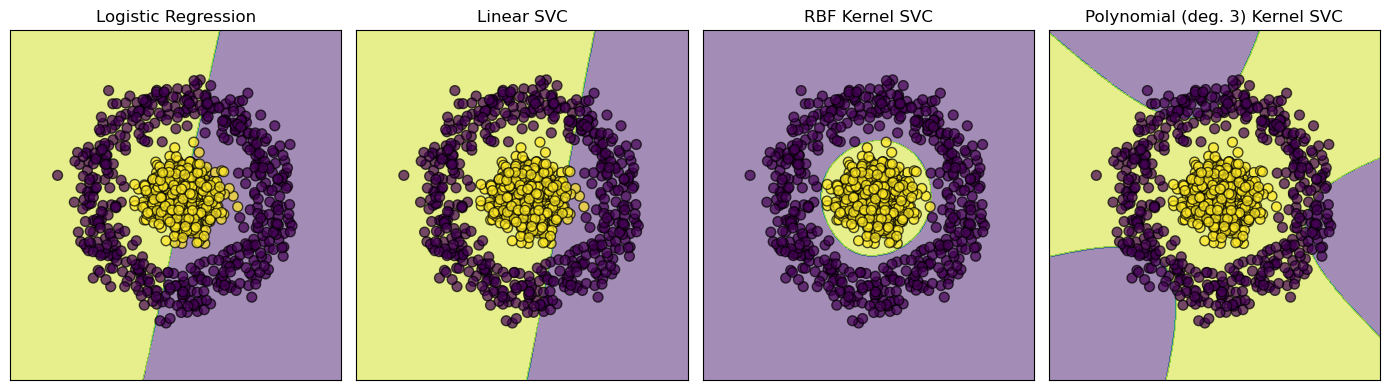

In [96]:
x_min, x_max = X[:,0].min() - 1, X[:,1].max() + 1
y_min, y_max = X[:,0].min() - 1, X[:,1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
titles = ['Logistic Regression', 'Linear SVC', 'RBF Kernel SVC', 'Polynomial (deg. 3) Kernel SVC']

plt.figure(figsize=(14,4))
for i, clf in enumerate ((lr, linear_svc, rbf_svc, poly_svc)):
    plt.subplot(1, 4, i+1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.viridis, alpha=0.5)
    plt.scatter(X[:,0], X[:,1], c=y, s=50, edgecolors='black', cmap=plt.cm.viridis, alpha=0.7)
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
plt.tight_layout()